In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Загрузка данных
Файл содержит информацию о количестве каждой пары части речи в тексте(название столбцов — части речи, первый столбец — индексы текстов). 

In [2]:
# Задаем путь к файлу
file_path = "~/PycharmProjects/Diplom/старые/bigram.csv"  

# Читаем данные из файла в DataFrame
df = pd.read_csv(file_path, sep=';', index_col=0)
# удалили 15,19,20,23 части речи и тексты с индексами 45,46

In [3]:
df.head()

,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,...,22_10,22_11,22_12,22_13,22_14,22_16,22_17,22_18,22_21,22_22
25,3655,1244,230,1921,1024,224,0,686,135,607,...,0,0,0,0,0,0,0,0,0,0
32,12403,3923,352,7182,4107,1225,95,3732,364,2561,...,75,113,106,2,0,0,0,13,0,6
35,69378,33109,1976,52348,47787,2525,1458,25719,2666,32551,...,3808,3408,5375,385,179,66,1592,821,0,703
36,6555,2035,423,10146,6983,308,356,5492,64,5308,...,690,615,956,76,24,0,336,45,0,66
38,104196,44659,5460,94823,72945,5417,1558,30986,1963,54376,...,2383,2440,2793,192,61,0,2485,344,17,136


In [18]:
import pandas as pd

# Вычисляем дисперсии для каждой переменной
variances = df.var()
dis =25
# Располагаем дисперсии в порядке убывания
sorted_variances = variances.sort_values(ascending=False)

# Получаем названия столбцов для первых дисперсий
top_dis_columns = sorted_variances.head(dis).index.tolist()

# Выводим дисперсий
print(f"Первые {dis} дисперсий в порядке убывания:")
print(sorted_variances.head(dis))

# Выводим названия столбцов для первых дисперсий
print(f"\nНазвания столбцов для первых {dis} дисперсий:")
print(top_dis_columns)


Первые 25 дисперсий в порядке убывания:
17_17    3.855111e+12
1_1      2.476168e+12
17_1     1.730623e+12
1_17     1.508595e+12
4_1      6.655639e+11
1_4      6.461434e+11
1_5      4.372958e+11
5_1      4.198302e+11
17_4     3.623359e+11
11_1     3.454173e+11
4_17     3.411879e+11
1_11     3.207573e+11
1_2      3.118368e+11
1_12     3.114435e+11
12_1     3.092803e+11
2_1      2.898619e+11
17_5     2.582939e+11
17_2     2.338846e+11
4_4      2.323499e+11
17_11    2.213069e+11
5_17     2.206389e+11
11_17    1.929785e+11
2_17     1.715359e+11
1_10     1.650486e+11
17_12    1.632191e+11
dtype: float64

Названия столбцов для первых 25 дисперсий:
['17_17', '1_1', '17_1', '1_17', '4_1', '1_4', '1_5', '5_1', '17_4', '11_1', '4_17', '1_11', '1_2', '1_12', '12_1', '2_1', '17_5', '17_2', '4_4', '17_11', '5_17', '11_17', '2_17', '1_10', '17_12']


In [19]:
new_df = df[top_dis_columns]
new_df

,17_17,1_1,17_1,1_17,4_1,1_4,1_5,5_1,17_4,11_1,...,2_1,17_5,17_2,4_4,17_11,5_17,11_17,2_17,1_10,17_12
25,0,3655,0,0,1949,1921,1024,1126,0,1217,...,1422,0,0,990,0,0,0,0,607,0
32,0,12403,0,0,6722,7182,4107,4109,0,4584,...,4451,0,0,3828,0,0,0,0,2561,0
35,1540,69378,6936,13952,43140,52348,47787,39868,5192,25115,...,31047,5224,3256,32640,3064,7936,5056,6376,32551,5264
36,3486,6555,6940,2720,8024,10146,6983,4632,10662,4040,...,2680,7092,2326,12403,4563,1392,1485,1118,5308,7226
38,104653,104196,147505,61801,103972,94823,72945,62327,139992,55759,...,38058,99322,59960,94395,76478,36246,32068,22938,54376,85651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,3240,162735,2025,44226,73880,79719,64098,54670,810,63892,...,59805,1215,405,36046,810,15633,17577,16038,14421,729
309,0,467061,0,0,299566,272898,197220,189580,0,222708,...,154715,0,0,174936,0,0,0,0,66647,0
310,0,294528,0,0,105088,106880,111283,109901,0,100938,...,86605,0,0,37950,0,0,0,0,31009,0
311,0,133903,0,0,53511,48017,45657,41367,0,62131,...,51252,0,0,19110,0,0,0,0,13678,0


#### Adequacy Test (Тест на адекватность)

Существует два метода проверки факторности или адекватности выборки:
- Тест Бартлетта
- Тест Кайзера-Майера-Олкина

**Тест Бартлетта** сферичности проверяет, взаимно ли коррелируют наблюдаемые переменные, используя наблюдаемую корреляционную матрицу против единичной матрицы. Если тест оказался статистически незначимым, вам не следует использовать факторный анализ.

In [20]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(new_df)
chi_square_value, p_value

(11540.577379522332, 0.0)

В этом тесте Бартлетта значение p равно 0. Тест был статистически значимым, что указывает на то, что наблюдаемая корреляционная матрица не является единичной матрицей.

**Тест Кайзера-Мейера-Олкина (КМО)** измеряет пригодность данных для факторного анализа. Он определяет адекватность каждой наблюдаемой переменной и всей модели. KMO оценивает долю дисперсии среди всех наблюдаемых переменных. Более низкая доля идентификатора больше подходит для факторного анализа. Значения KMO находятся в диапазоне от 0 до 1. Значение KMO менее 0,6 считается недостаточным.

In [21]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Повторно оцениваем KMO
kmo_all, kmo_model = calculate_kmo(new_df)
print("KMO:", kmo_model)



KMO: 0.778058509140698


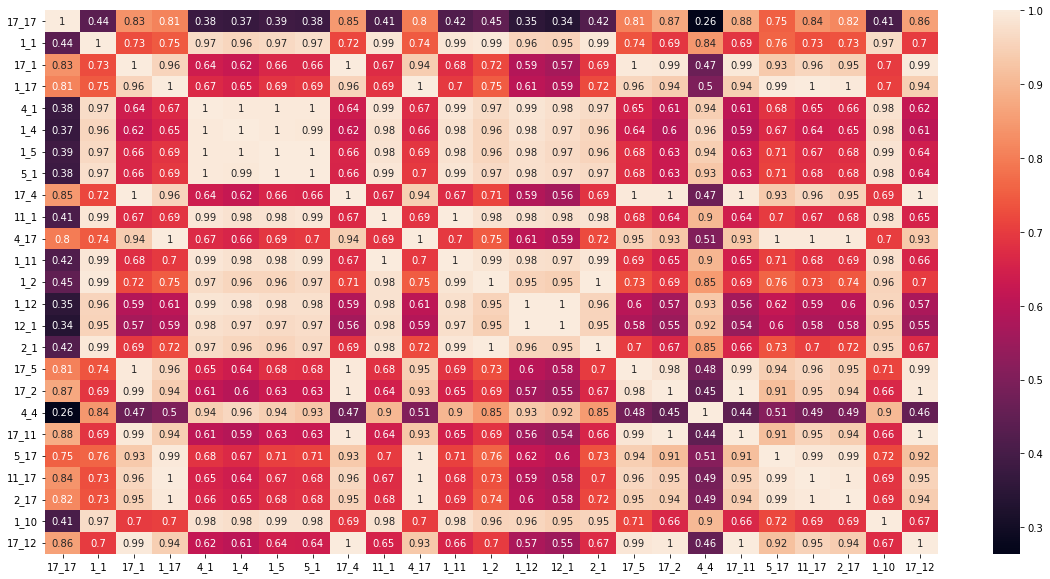

In [23]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= new_df.corr()
sns.heatmap(c, annot=True);

#### Выбор количества факторов

Для выбора количества факторов можно использовать критерий Кайзера и осыпной график. Оба основаны на собственных значениях.

In [25]:
# Создание и выполнение факторного анализа 
fa = FactorAnalyzer()
#собственные значения и собственные векторы
fa.fit(new_df)
# Проверка собственных значений
ev, v = fa.get_eigenvalues()
ev

array([1.99109416e+01, 4.23011714e+00, 3.42128946e-01, 2.38656114e-01,
       1.73657095e-01, 3.92223247e-02, 3.55018436e-02, 8.36878126e-03,
       6.92319820e-03, 4.19056633e-03, 2.67313796e-03, 2.34106877e-03,
       1.51225960e-03, 1.16950194e-03, 7.74464402e-04, 5.11302713e-04,
       4.78479338e-04, 3.20276877e-04, 2.32618830e-04, 9.42603201e-05,
       6.32502529e-05, 5.60723928e-05, 4.64614317e-05, 1.68148793e-05,
       2.44935332e-06])

Для 2-фактора, собственные значения больше единицы. 

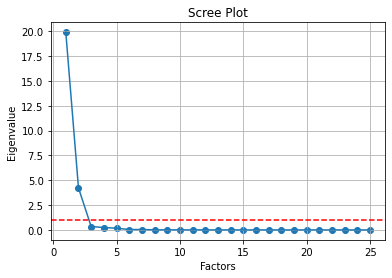

In [26]:
# Создание scree диаграммы
plt.scatter(range(1,new_df.shape[1]+1),ev)
plt.plot(range(1,new_df.shape[1]+1),ev)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Метод осыпной диаграммы рисует прямую линию для каждого фактора и его собственных значений. Число собственных значений больше единицы считается числом факторов. Красная линия ограничивает собственное значение, равное 1.

Здесь это видно только для 2-факторов, собственные значения которых больше единицы.

### Выполнение факторного анализа для 2


   Original column name   Factor1   Factor2
0                 17_17  0.088985  0.868397
1                   1_1  0.879033  0.446389
2                  17_1  0.349908  0.925913
3                  1_17  0.384535  0.905803
4                   4_1  0.940383  0.337502
5                   1_4  0.942241  0.320678
6                   1_5  0.925729  0.363762
7                   5_1  0.928179  0.364161
8                  17_4  0.342777  0.931012
9                  11_1  0.923359  0.374128
10                 4_17  0.391397  0.893263
11                 1_11  0.919598  0.382077
12                  1_2  0.874349  0.449205
13                 1_12  0.951174  0.276220
14                 12_1  0.950962  0.256085
15                  2_1  0.887189  0.415097
16                 17_5  0.367279  0.915633
17                 17_2  0.315144  0.934648
18                  4_4  0.920883  0.165232
19                17_11  0.309106  0.939011
20                 5_17  0.413015  0.872338
21                11_17  0.36273

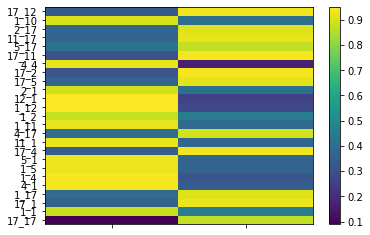

In [28]:
fa = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
fa.fit(new_df)
factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]


results_new = {'Original column name': list(new_df.columns),
          'Factor1': factor1_new, 
          'Factor2': factor2_new,
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2'])
print(results_new)

# Получение дисперсии каждого фактора
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2'])
print(statistics)

Z = np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(new_df.columns.values)
ax.set_xticklabels(np.arange(1,1))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для 1_10, 4_4, 2_1, 12_1, 1_12, 1_2, 1_11, 11_1, 5_1, 1_5, 1_4, 4_1, 1_1.
- Фактор 2 имеет высокие факторные нагрузки для 17_17, 17_1, 1_17, 17_4, 4_17, 17_5, 17_2, 17_11, 5_17, 11_17, 2_17, 17_12.


2 фактора объясняют 96.23% дисперсии

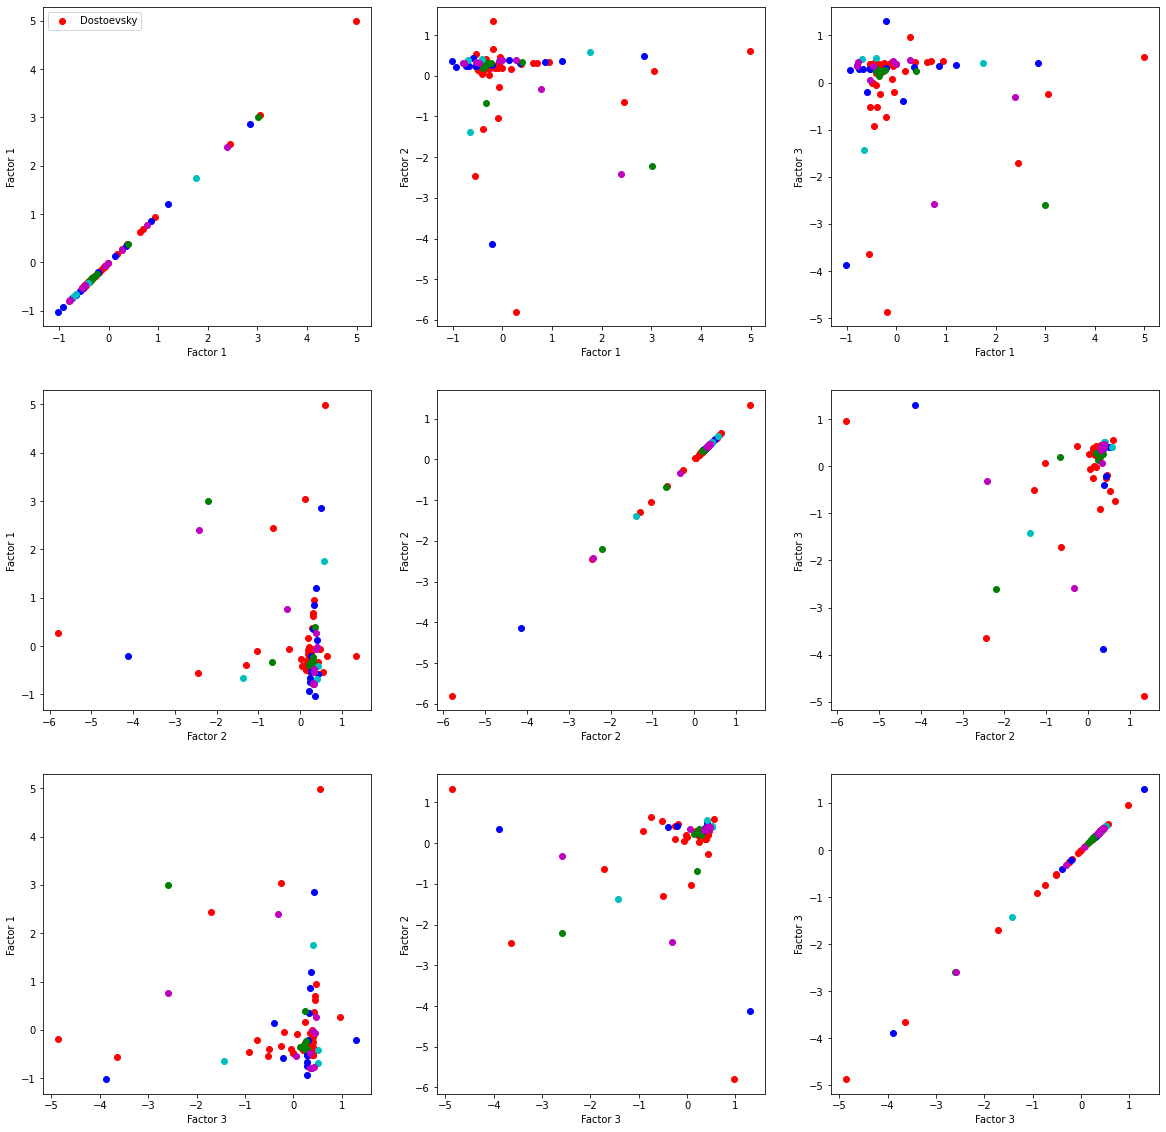

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Предположим, что индексы для разделения data2 заданы следующим образом
indices_1 = [146, 151, 152, 180, 286, 287, 288, 289, 290, 308, 309, 310, 311, 312]  # Мещерского
indices_2 = [24, 26, 37, 39, 237, 238, 239, 245, 246, 247, 248, 306]  # других авторов
indices_3 = [89, 90, 177, 198]  # А.Григорьева
indices_4 = [85, 116, 117, 125, 199, 292, 293, 294, 295, 296]  # Н.Н.Страхова

# Разбиваем таблицу на две части
data1 = new_df.head(48)
data2 = new_df.tail(new_df.shape[0] - 48)

# Производим факторный анализ для data1
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

fa = FactorAnalysis(n_components=3, rotation='varimax')
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

# Инициализируем фигуру для построения графика
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Цвета для различных поддатасетов data2
colors = ['b', 'g', 'c', 'm']  

# Добавляем точки для data1 на график
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky' if i == 0 and j == 0 else "")
        axs[i, j].set_xlabel(f'Factor {i + 1}')
        axs[i, j].set_ylabel(f'Factor {j + 1}')
        if i == 0 and j == 0:
            axs[i, j].legend()

# Добавляем точки для каждого поддатасета data2 на график
for k, indices in enumerate([indices_1, indices_2, indices_3, indices_4]):
    data2_subset = data2.loc[indices]
    if not data2_subset.empty:
        data2_subset_scaled = scaler.fit_transform(data2_subset)
        data2_subset_factors = fa.transform(data2_subset_scaled)
        for i in range(3):
            for j in range(3):
                axs[i, j].scatter(data2_subset_factors[:, i], data2_subset_factors[:, j], c=colors[k], label=f'Others {k+1}' if i == 0 and j == 0 else "")

plt.show()



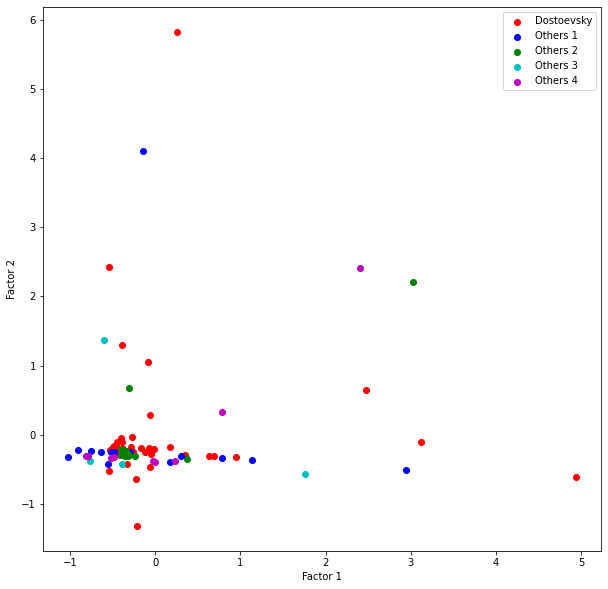

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Предположим, что индексы для разделения data2 заданы следующим образом
indices_1 = [146, 151, 152, 180, 286, 287, 288, 289, 290, 308, 309, 310, 311, 312]  # Мещерского
indices_2 = [24, 26, 37, 39, 237, 238, 239, 245, 246, 247, 248, 306]  # других авторов
indices_3 = [89, 90, 177, 198]  # А.Григорьева
indices_4 = [85, 116, 117, 125, 199, 292, 293, 294, 295, 296]  # Н.Н.Страхова

# Разбиваем таблицу на две части
data1 = new_df.head(48)
data2 = new_df.tail(new_df.shape[0] - 48)

# Производим факторный анализ для data1
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

fa = FactorAnalysis(n_components=4, rotation='varimax')
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

# Инициализируем фигуру для построения графика
fig, ax = plt.subplots(figsize=(10, 10))

# Цвета для различных поддатасетов data2
colors = ['b', 'g', 'c', 'm']

# Добавляем точки для data1 на график
ax.scatter(data1_factors[:, 0], data1_factors[:, 1], c='r', label='Dostoevsky')
ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')

# Добавляем точки для каждого поддатасета data2 на график
for k, indices in enumerate([indices_1, indices_2, indices_3, indices_4]):
    data2_subset = data2.loc[indices]
    if not data2_subset.empty:
        data2_subset_scaled = scaler.fit_transform(data2_subset)
        data2_subset_factors = fa.transform(data2_subset_scaled)
        ax.scatter(data2_subset_factors[:, 0], data2_subset_factors[:, 1], c=colors[k], label=f'Others {k+1}')

# Добавляем легенду
ax.legend(loc='upper right')

plt.show()

### Выполнение SVM

Kernel: linear
Accuracy: 0.6666666666666666
Factors 1 and 2, Accuracy: 0.38
Points reflected from dataset 0: [1, 10, 15, 16, 18, 19]
Points reflected from dataset 1: [13, 14, 22]


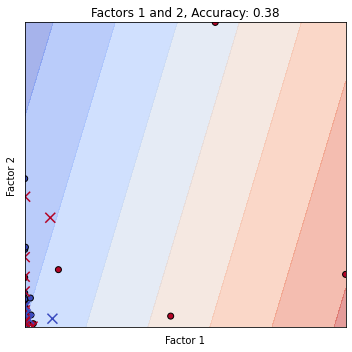

Выбранные строки из датасета 1:
     Factor1  Factor2
32       NaN      NaN
76       NaN      NaN
97       NaN      NaN
99       NaN      NaN
126      NaN      NaN
130      NaN      NaN
Выбранные строки из датасета 2:
     Factor1  Factor2
177      NaN      NaN
180      NaN      NaN
247      NaN      NaN


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis
from itertools import combinations

# данных для двух датасетов с разным количеством строк
dataset1 = new_df.head(48)
dataset2 = new_df.tail(new_df.shape[0] - 48)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=2, rotation='varimax')
fa2 = FactorAnalysis(n_components=2, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f'Kernel: linear')
# Обучение SVM модели
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

def print_reflected_indices(X_test, y_test, y_pred):
    reflected_indices = {}
    for idx, (test_point, pred_label) in enumerate(zip(X_test, y_pred)):
        true_label = y_test[idx]
        if pred_label == true_label:
            if true_label not in reflected_indices:
                reflected_indices[true_label] = [idx]
            else:
                reflected_indices[true_label].append(idx)
    for label, indices in reflected_indices.items():
        print(f'Points reflected from dataset {label}: {indices}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(5, 5))
pairs = list(combinations(range(2), 2))
for i, pair in enumerate(pairs):
    plt.subplot(1, 1, i + 1)

    # Обучение SVM модели
    svm_model.fit(X_train[:, pair], y_train)

    # Определение границ графика
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Предсказание на тестовом наборе данных
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    print_reflected_indices(X_test[:, pair], y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

# Вывод определенных строк из датасета
def print_selected_rows(dataset, indices):
    selected_rows = dataset.iloc[indices]
    print(selected_rows)

print("Выбранные строки из датасета 1:")
print_selected_rows(df1, [1, 10, 15, 16, 18, 19])

print("Выбранные строки из датасета 2:")
print_selected_rows(df2,  [13, 14, 22])